In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [392]:
#loading our datasets
results = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\results.csv')
ranking = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Week 6 IP Datasets\fifa_ranking.csv')

In [393]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [394]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [395]:
print('rankings:' ,ranking.shape)
print('results:', results.shape)

rankings: (57793, 16)
results: (40839, 9)


In [396]:
print("duplicates present:",ranking.duplicated().any())
# Drop the duplicate rows from the dataset except for the first occurrence
ranking = ranking.drop_duplicates(keep = 'first')

duplicates present: True


In [397]:
ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [398]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [399]:
print('missing values for ranking dataset:')
print(ranking.isnull().sum())
print('***************************************')
print('missing values for results dataset:')
print(results.isnull().sum())

missing values for ranking dataset:
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
***************************************
missing values for results dataset:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [400]:
print('datatype types for ranking dataset')
print(ranking.info())
print('datatype types for results dataset')
print(results.info())

datatype types for ranking dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57756 non-null  int64  
 1   country_full             57756 non-null  object 
 2   country_abrv             57756 non-null  object 
 3   total_points             57756 non-null  float64
 4   previous_points          57756 non-null  int64  
 5   rank_change              57756 non-null  int64  
 6   cur_year_avg             57756 non-null  float64
 7   cur_year_avg_weighted    57756 non-null  float64
 8   last_year_avg            57756 non-null  float64
 9   last_year_avg_weighted   57756 non-null  float64
 10  two_year_ago_avg         57756 non-null  float64
 11  two_year_ago_weighted    57756 non-null  float64
 12  three_year_ago_avg       57756 non-null  float64
 13  three_year_ago_weighted  57756 non-null  

In [401]:
#converting date into standard date format
ranking['rank_date']= ranking['rank_date'].astype('datetime64[ns]')
results['date'] = results['date'].astype('datetime64[ns]')

In [402]:
print('datatype types for ranking dataset')
print(ranking.info())
print('datatype types for results dataset')
print(results.info())

datatype types for ranking dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 1

#descriptive stastis

In [403]:
ranking['year'] = ranking.rank_date.dt.year
results['year'] = results.date.dt.year
print(results['year'].max())

2019


In [404]:
#selecting dates above 1992
ranking_df = ranking[ranking['rank_date']>= '1992']
results_df = results[results['date']>= '1992']

In [405]:

ranking_df['month'] = ranking.rank_date.dt.month
results_df['month'] = results_df.date.dt.month

C:\Users\Gideon Kipkorir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [406]:
ranking_df = ranking_df.drop(columns = ['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation'],axis =1)


In [407]:
ranking_df.head()

,rank,country_full,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8


In [408]:
print(ranking_df.info())
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          57756 non-null  int64         
 1   country_full  57756 non-null  object        
 2   rank_date     57756 non-null  datetime64[ns]
 3   year          57756 non-null  int64         
 4   month         57756 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24058 entries, 16781 to 40838
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        24058 non-null  datetime64[ns]
 1   home_team   24058 non-null  object        
 2   away_team   24058 non-null  object        
 3   home_score  24058 non-null  int64         
 4   away_score  24058 non-null  int64         
 5   tournament  24

In [409]:
results_df = results_df.drop(['city',  'neutral'], 1)
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,year,month
16781,1992-01-04,Egypt,Czechoslovakia,2,0,Friendly,Egypt,1992,1
16782,1992-01-05,DR Congo,Ivory Coast,2,0,Friendly,Zaïre,1992,1
16783,1992-01-05,Guyana,Barbados,0,2,Friendly,Guyana,1992,1
16784,1992-01-07,Egypt,Norway,0,0,Friendly,Egypt,1992,1
16785,1992-01-12,Cameroon,Morocco,1,0,African Cup of Nations,Senegal,1992,1


In [410]:
#Merging the dataset to get home_team ranking
rank_home = pd.merge(results_df, ranking_df, how = 'inner', left_on = ['home_team','year', 'month'], right_on = ['country_full','year','month'])

In [411]:
rank_home = rank_home.rename({'rank': 'home_team_rank'}, axis =1)
rank_home = rank_home.drop(['country_full','rank_date'],1)
rank_home.head()

,date,home_team,away_team,home_score,away_score,tournament,country,year,month,home_team_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,70
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,1993,8,70


In [412]:
team_rank = pd.merge(rank_home, ranking_df, how ='inner', left_on = ['away_team', 'year','month'], right_on = ['country_full', 'year', 'month'])
team_rank = team_rank.rename({'rank':'away_team_rank'}, axis =1)
team_rank = team_rank.drop(['country','country_full','rank_date','date'],1)

In [413]:
team_rank.head()

,home_team,away_team,home_score,away_score,tournament,year,month,home_team_rank,away_team_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,1993,8,19,67
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,1993,8,5,67
2,Colombia,Argentina,2,1,FIFA World Cup qualification,1993,8,19,5
3,Peru,Argentina,0,1,FIFA World Cup qualification,1993,8,70,5
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,1993,8,67,5


# Feature engineering

In [414]:
outcomes = team_rank.home_score - team_rank.away_score
Outcome = []
for outcome in outcomes:
    if outcome> 0:
        Outcome.append('win')
    elif outcome == 0:
        Outcome.append('draw')
    elif outcome< 0:
        Outcome.append('loss')
    else:
        Outcome.append(np.nan)
team_rank['Match_outcome'] =Outcome 
  

In [415]:
def tournament(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

team_rank['tournament'] = team_rank.tournament.apply(lambda x: tournament(x))

In [416]:
tm_rank  = team_rank

In [417]:
tm_rank.sample(6)

,home_team,away_team,home_score,away_score,tournament,year,month,home_team_rank,away_team_rank,Match_outcome
11672,New Caledonia,Tahiti,3,1,Other,2011,9,155,184,win
5601,San Marino,Hungary,0,5,Other,2003,6,161,49,loss
2274,Senegal,Mali,3,1,Friendly,1998,7,85,67,win
4469,Morocco,Gabon,0,1,Other,2001,6,28,91,loss
2106,Togo,Mali,0,4,Friendly,1998,2,79,69,loss
13777,Oman,Singapore,3,1,Other,2014,3,81,149,win


# Decriptive statistics

In [418]:
tm_rank.select_dtypes(include=['int64']).describe()

,home_score,away_score,year,month,home_team_rank,away_team_rank
count,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000
mean,1.603499,1.068448,2006.493675,6.874099,76.030855,78.885093
std,1.615346,1.244975,6.801394,3.274426,50.833921,52.039983
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,35.000000
50%,1.000000,1.000000,2007.000000,7.000000,70.000000,72.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,115.000000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,209.000000


In [419]:
tm_rank.select_dtypes(include = 'object').describe()

,home_team,away_team,tournament,Match_outcome
count,16918,16918,16918,16918
unique,193,193,3,3
top,Mexico,Zambia,Other,win
freq,253,190,10307,8180


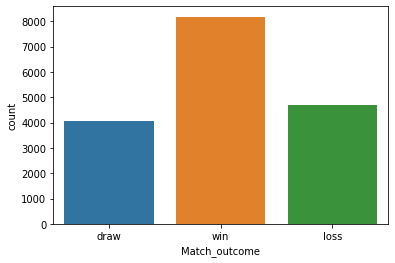

In [420]:
sns.countplot(x ='Match_outcome', data = tm_rank )

skewness: 2.3244564775459584


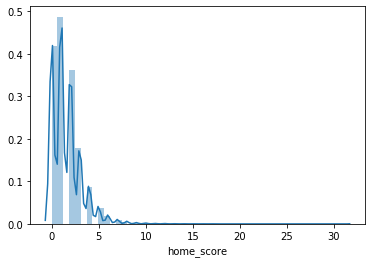

In [421]:
#checking for distribution of away and home teams scores
print('skewness:', tm_rank.home_score.skew())
sns.distplot(tm_rank['home_score'] )



In [422]:
#applying log transformation into convert the data into a normal distribution
tm_rank['home_score'] = np.log(tm_rank.home_score+1)

skewness: 0.08171001101183603


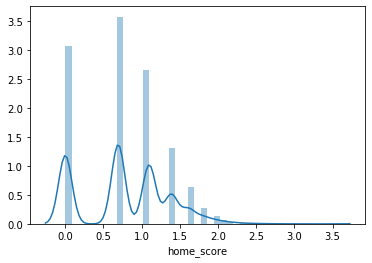

In [423]:
print('skewness:', tm_rank.home_score.skew())
sns.distplot(tm_rank['home_score'] )#after log transforming the data

skewness: 1.9280549163452845


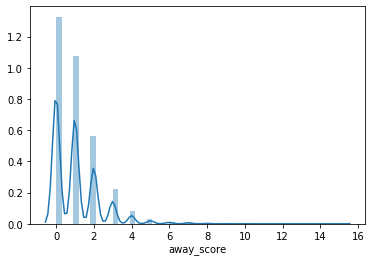

In [424]:
print('skewness:', tm_rank.away_score.skew())
sns.distplot(tm_rank['away_score'])#Data is skewed


In [425]:
#to remove skewness
tm_rank.away_score = np.log(tm_rank.away_score + 1)

skewness: 0.3809243368509408


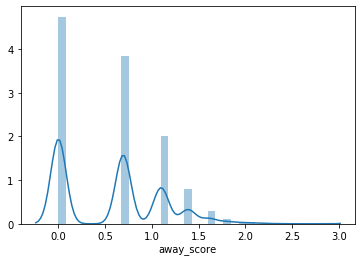

In [426]:
print('skewness:', tm_rank.away_score.skew())
sns.distplot(tm_rank['away_score'])

In [427]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tm_rank[['home_team','away_team','tournament']] = tm_rank[['home_team','away_team','tournament']].apply(le.fit_transform)

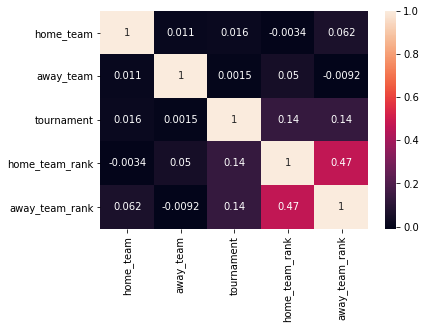

In [428]:
#testing for multicolinearity
cor = tm_rank[['home_team','away_team','tournament','home_team_rank','away_team_rank',]].corr()
sns.heatmap(tm_rank[['home_team','away_team','tournament','home_team_rank','away_team_rank']].corr(), annot = True)

In [429]:
#testing for multicolinearity through variance inflation factor
vif = pd.DataFrame(np.linalg.inv(cor.values), index = cor.index, columns=cor.columns)
vif

,home_team,away_team,tournament,home_team_rank,away_team_rank
home_team,1.005559,-0.013612,-0.011244,0.044083,-0.081778
away_team,-0.013612,1.004060,0.002404,-0.070636,0.042972
tournament,-0.011244,0.002404,1.025653,-0.094956,-0.093400
home_team_rank,0.044083,-0.070636,-0.094956,1.298809,-0.600806
away_team_rank,-0.081778,0.042972,-0.093400,-0.600806,1.300405


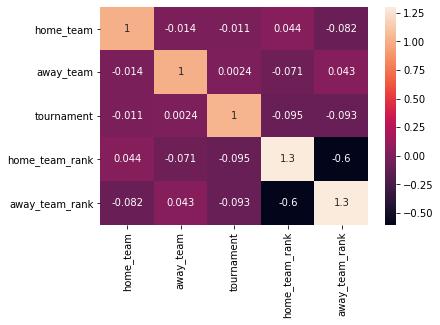

In [430]:
sns.heatmap(vif,annot = True)

* A rule of thumb for interpreting the variance inflation factor: 1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated
* there is no correlation between independent variables

In [431]:
tm_rank.sample(6)

,home_team,away_team,home_score,away_score,tournament,year,month,home_team_rank,away_team_rank,Match_outcome
8453,128,129,0.693147,1.386294,2,2007,6,134,32,loss
11158,109,97,1.791759,0.693147,2,2010,12,144,169,win
3555,158,131,0.000000,0.000000,2,2000,6,46,7,draw
10039,90,80,1.098612,1.098612,1,2009,5,70,122,draw
7681,59,43,1.098612,0.693147,1,2006,3,165,111,win
9738,41,129,0.693147,0.000000,1,2008,11,40,22,win


# Model 1: Predict how many goals the home team scores.

In [432]:
#Seperating dependent and independent variables
x = tm_rank.drop(['home_score', 'Match_outcome'],1)
y = tm_rank.home_score

In [433]:
tm_rank.isnull().sum()

home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
year              0
month             0
home_team_rank    0
away_team_rank    0
Match_outcome     0
dtype: int64

In [434]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)

In [435]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
#using the model to make prediction
y_pred = lr.predict(x_test)

In [436]:
#evaluating our model using rmse
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

0.5042371159357081


In [437]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_ptrain = poly.fit_transform(x_train)
x_ptest = poly.fit_transform(x_test)
poly_r = LinearRegression()
poly_r = poly_r.fit(x_ptrain, y_train)

In [438]:
# print(poly_r.intercept_)
# print(poly_r.coef_)dd

In [439]:
# Evaluating the model
y_pred = poly_r.predict(x_ptest)#Making prediction
#calculating rmse of the model
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))

In [440]:
print(rmse)

0.5010418572883557


# Optimizing the model

In [441]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=lr, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(x_train, y_train)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')
print(f'Best score is {grid_search.best_params_}')

Best score is -0.262435788116001
Best score is {'fit_intercept': True, 'normalize': True}


In [442]:
lr = LinearRegression(fit_intercept = True, normalize = True)
Lr = lr.fit(x_train, y_train)

In [443]:
y_pred = Lr.predict(x_test)

In [444]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.5042371159357082

In [445]:
residuals = np.subtract(y_test, y_pred)
residuals.describe()

count    3384.000000
mean        0.020317
std         0.503902
min        -1.306056
25%        -0.347518
50%         0.044109
75%         0.391096
max         1.978203
Name: home_score, dtype: float64

Text(0, 0.5, 'residuals')

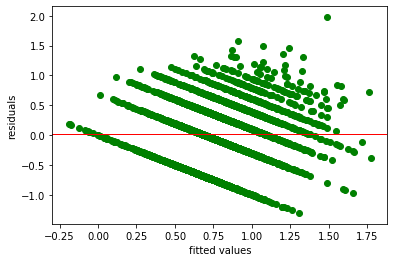

In [446]:
plt.scatter(y_pred, residuals, color = 'green')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(), color ='red', linewidth = 1)
plt.ylabel('residuals')

# test for homogeniuity

In [447]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [498]:
test_result

1980.6050547583257

# Model 2: Predict how many goals the away team scores.

In [448]:
away_team  = tm_rank
away_team.head()

,home_team,away_team,home_score,away_score,tournament,year,month,home_team_rank,away_team_rank,Match_outcome
0,41,137,0.000000,0.000000,2,1993,8,19,67,draw
1,8,137,0.000000,0.000000,2,1993,8,5,67,draw
2,41,8,1.098612,0.693147,2,1993,8,19,5,win
3,138,8,0.000000,0.693147,2,1993,8,70,5,loss
4,137,8,0.693147,1.386294,2,1993,8,67,5,loss


In [449]:
y = away_team['away_score']
x = tm_rank[['home_team','away_team','tournament','home_team_rank','away_team_rank']]

In [450]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 45)
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
#using the model to make prediction
y_pred = lr.predict(x_test)

In [451]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

0.50218766009139


In [452]:
poly = PolynomialFeatures(degree = 3,)
x_ptrain = poly.fit_transform(x_train)
x_ptest = poly.fit_transform(x_test)
poly_r = LinearRegression()
poly_r = poly_r.fit(x_ptrain, y_train)

In [453]:
# Evaluating the model
y_pred = poly_r.predict(x_ptest)#Making prediction
#calculating rmse of the model
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(rmse)

0.49909195763449243


In [454]:
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=lr, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(x_ptrain, y_train)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_}')
print(f'Best score is {grid_search.best_params_}')

Best score is -0.23775276770332726
Best score is {'fit_intercept': True, 'normalize': True}


In [455]:
poly_r = LinearRegression(fit_intercept = True, normalize = False)
poly_r = poly_r.fit(x_ptrain, y_train)

In [456]:
# Evaluating the model
y_pred = poly_r.predict(x_ptest)#Making prediction
#calculating rmse of the model
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
print(rmse)

0.49909195763449243


In [457]:
residuals = np.subtract(y_test, y_pred)
residuals.describe()

count    3384.000000
mean        0.009444
std         0.499076
min        -1.401806
25%        -0.438227
50%         0.049152
75%         0.381590
max         1.704565
Name: away_score, dtype: float64

Text(0, 0.5, 'residuals')

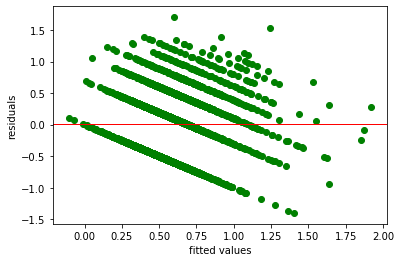

In [458]:
plt.scatter(y_pred, residuals, color = 'green')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(), color ='red', linewidth = 1)
plt.ylabel('residuals')

In [459]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Approach 2: Logistic approach

In [488]:
wins = tm_rank[tm_rank['Match_outcome']== 'win']
loss = tm_rank[tm_rank['Match_outcome']== 'loss']
draw= tm_rank[tm_rank['Match_outcome']== 'draw']
print('wins:',len(wins))
print('loss:', len(loss))
print('draw:', draw.shape)

wins: 8180
loss: 4679
draw: (4059, 10)


In [489]:
#Balancing the data
wins = wins.sample(4700)
# consolidatingthe datasets
bal_out = pd.concat([wins, loss, draw], axis = 0)
bal_out = bal_out.drop(['home_score', 'away_score'],1)
bal_out.sample(6)


,home_team,away_team,tournament,year,month,home_team_rank,away_team_rank,Match_outcome
6785,124,65,2,2004,10,5,45,win
5631,66,41,2,2003,6,2,22,win
16229,90,34,2,2017,7,76,100,win
7477,137,174,1,2005,11,30,56,win
7218,93,178,2,2005,6,148,14,loss
15334,186,159,2,2016,5,181,192,loss


In [490]:
#label encoding match out comes
bal_out['Match_outcome'] = bal_out['Match_outcome'].replace({'win': 1, 'draw': 0, 'loss':-1} )

# bal_out[['home_team','away_team','tournament']] = bal_out[['home_team','away_team','tournament']].apply(le.fit_transform)

In [491]:
bal_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13438 entries, 5845 to 16916
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   home_team       13438 non-null  int32
 1   away_team       13438 non-null  int32
 2   tournament      13438 non-null  int32
 3   year            13438 non-null  int64
 4   month           13438 non-null  int64
 5   home_team_rank  13438 non-null  int64
 6   away_team_rank  13438 non-null  int64
 7   Match_outcome   13438 non-null  int64
dtypes: int32(3), int64(5)
memory usage: 787.4 KB


In [493]:
# split dependent and independent variales
x = bal_out.drop(['Match_outcome'],1)
y = bal_out['Match_outcome']
#spliting data into train and validation dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =10)


In [494]:
print(x_train.shape)
print(y_train.shape)

(10750, 7)
(10750,)


In [495]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 350)
logreg = logreg.fit(x_train, y_train)

In [496]:
y_pred = logreg.predict(x_test) #making predictions
#evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[628 113 223]
 [336 129 320]
 [186  90 663]]


In [497]:
logreg.score(x_test, y_test)

0.5282738095238095

In [506]:
#Displaying the parameters
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Observation:** The logistic regression model has poor prediction overally it achieved an accuracy of 52 percent which barely meets our metric of success.

**Conclusion:** the data is insufficient to make predictions of a match outcome